# `fytok.Tokamak`


## 简介

`fytok.Tokmak` 用于执行集成工作流。不在 IMAS DD 的 IDS 定义之内，它包含多个 Module/IDS/Actor，通过驱动 Module 根据物理逻辑更新演化，实现集成建模功能。下图为 1.5 维芯部输运的工作流。



![fytok_flow](./figures/FyTok_en.png)

## `class Tokamak(Actor)`

```{eval-rst}
.. autoclass:: fytok.Tokamak.Tokamak
    :members: brief_summary,title,tag, refresh,
    :undoc-members: wall, tf, pf_active, magnetics, equilibrium, core_profiles, core_transport, core_sources, transport_solver
    :special-members: __init__
    :member-order: bysource
    :show-inheritance: True
```


## 示例

In [1]:
from fytok.Tokamak import Tokamak

2023-11-29 08:59:04,274 [   fytok]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta extension=0.2.2.dev11+g706f667, imas_version=v3_38_1_dirty)

 Run by salmon at 2023-11-29T08:59:04.274207.
 Job ID: fytok_salmon_surface_3574

###################################################################################################



## 创建 Tokamak 实例
初始化信息包括

| 参数 | 解释 |
|--------------------------|-------------------------------------------------|
| "file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16HR.txt" |  数据源。指向一个geqdsk文件，提供平衡信息| 
| device="ITER",        |指定装置名称。根据装置名称，可以自动调取装置的静态信息，例如，wall.limiter 的几何形状，pf_active.coils 极向场线圈的位置等等。默认支持的装置信息，括EAST、ITER和D3D，可通过配置文件扩展其他装置。|
| shot=900003，         |指定放电的炮号。若数据源包含实验数据库，会自动读取相应的炮号作为数据。|
| run=0，               |指定模拟运行的编号。若数据源中包含可写入的是模拟数据库，写入模拟结果是会作为数据 index 的一部分。|
| equilibrium={"code.name:  "fy_eq" } | 指定子模块 equilibrium 的初始化信息。其中 code.name="fy_eq"，意为调用路径 `fytok.modules.equilibrium.fy_eq` 下的插件|

`tok.refresh(time=5.0)` 指定时间。若数据源中包含实验或者模拟数据库，则会查找最接近的时间片导入。 


In [2]:
tok = Tokamak(
    "mdsplus:///home/salmon/workspace/fytok_data/mdsplus/~t/?enable=efit_east",
    device="east",
    shot=70754,
    run=0,
    equilibrium={"code.name": "fy_eq"},
)

tok.refresh(time=5.0)

2023-11-29 08:59:04,416 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.plugins.data.plugin_xml
2023-11-29 08:59:04,837 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module fytok.plugins.equilibrium.fy_eq
2023-11-29 08:59:04,939 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.plugins.data.plugin_mdsplus
2023-11-29 08:59:04,942 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/plugins/data/plugin_mdsplus.py:118:get_tree: Open MDSplus Tree [efit_east] shot=70754
2023-11-29 08:59:04,985 [   fytok]    DEBUG: /home/salmon/workspace/fytok/python/fytok/modules/Utilities.py:121:execute: Execute fytok.plugins.equilibrium.fy_eq-0.0.1 [Zhi YU@ASIPP]


## 展示概要信息

展示模拟的概要信息，包括 
- 装置名称、炮号、运行序号，
- 使用者、运行环境、运行时间、采用的 Ontology 版本
- 调用的模块信心

In [3]:
print(tok.brief_summary)

2023-11-29 08:59:05,033 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module fytok.plugins.transport_solver_numerics.fy_trans
Tokamak simulation : 
---------------------------------------------------------------------------------------------------
                                                Brief Summary
---------------------------------------------------------------------------------------------------
Dataset Description:
 
    Device: EAST, Shot: 70754, Run: 0, 
    Run by Salmon on Surface at 2023-11-29T08:59:05.026536, base on ontology "modified imas/3"

---------------------------------------------------------------------------------------------------
Modules:
    transport_solver        : fy_trans-0.0.1 [fytok]
    equilibrium             : fy_eq-0.0.1 [Zhi YU@ASIPP]

    core_profiles           : N/A             
    core_transport          : 
    core_sources            : 
--------------------------------------

## 可视化
FyTok 提供了适用于 JupyterLab 环境的可视化接口，`spdm.view.View.display()`调用。默认情况下，`Tokamak` 会将能够获取到的信息尽可能绘制到一张图上。如下图，展示了 pf_active 极向场线圈、magnetic 磁场探针，wall.limiter 壁, interferometer 干涉仪的几何信息，磁平衡信息给出了二维磁面的等高线，最外层磁面、磁轴、X-point等信息。

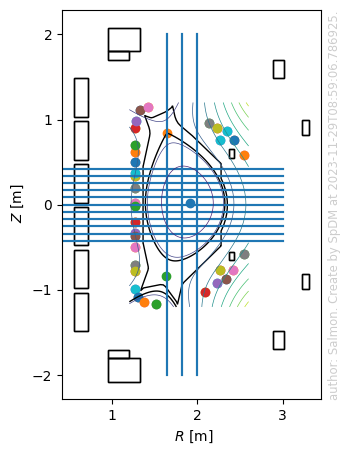

In [6]:
from spdm.view import View as sp_view

fig=sp_view.display(tok)